 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
wr = Path("whale_returns.csv")
whale_returns_df = pd.read_csv(wr, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [3]:
# Count nulls
whale_returns_df.isnull()
whale_returns_df.isna().sum().sum()

4

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
ag = Path("algo_returns.csv")
alg_daily_df = pd.read_csv(ag, index_col='Date', infer_datetime_format=True, parse_dates=True)
alg_daily_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
alg_daily_df.isnull()
alg_daily_df.isna().sum().sum()

6

In [7]:
# Drop nulls
alg_daily_df.dropna(inplace=True)
alg_daily_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns 
Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500 = Path("sp500_history.csv")
sp500_ret_df = pd.read_csv(sp500, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_ret_df.sort_index(inplace=True)
sp500_ret_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_ret_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_ret_df['Close'] = sp500_ret_df['Close'].replace({'\$':' '}, regex=True)
sp500_ret_df['Close'] = sp500_ret_df['Close'].astype(float, errors= 'raise')
sp500_ret_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_daily = sp500_ret_df.pct_change()
sp500_daily.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_daily = sp500_daily.dropna().copy()
sp500_daily.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
sp500_daily.isna().sum().sum()

0

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily = sp500_daily.rename(columns = {"Close":"S&P Daily"})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([alg_daily_df, whale_returns_df, sp500_daily], axis="columns", join="inner")
combined_df

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P Daily
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.004389
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001196
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.003944
...,...,...,...,...,...,...,...
2019-04-16,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.000509
2019-04-17,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,-0.002274
2019-04-18,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916,0.001579


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

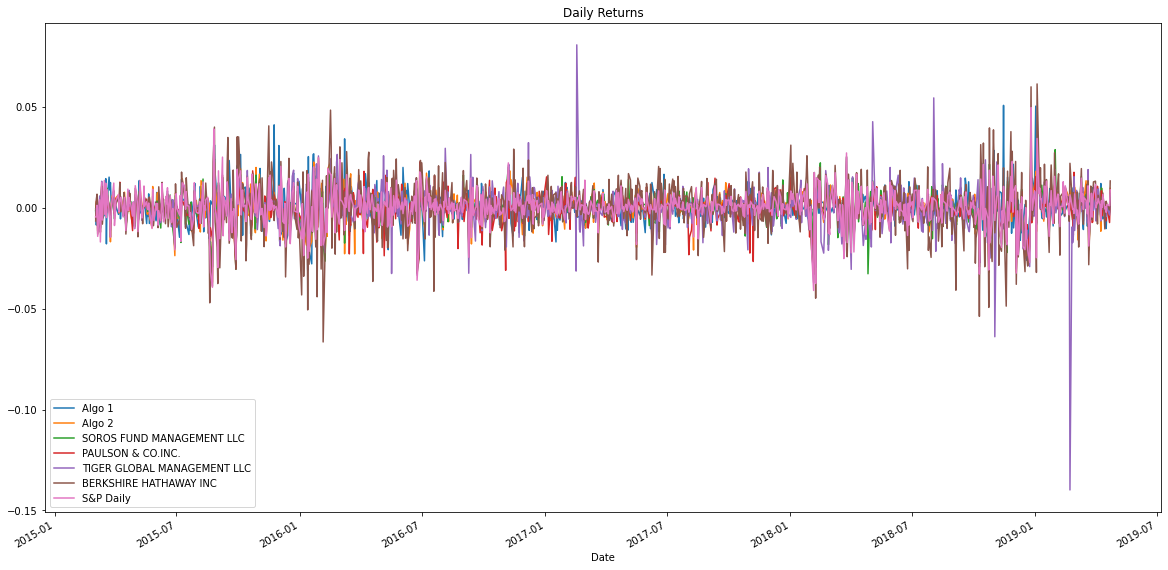

In [16]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10), title='Daily Returns')

#### Calculate and Plot cumulative returns.

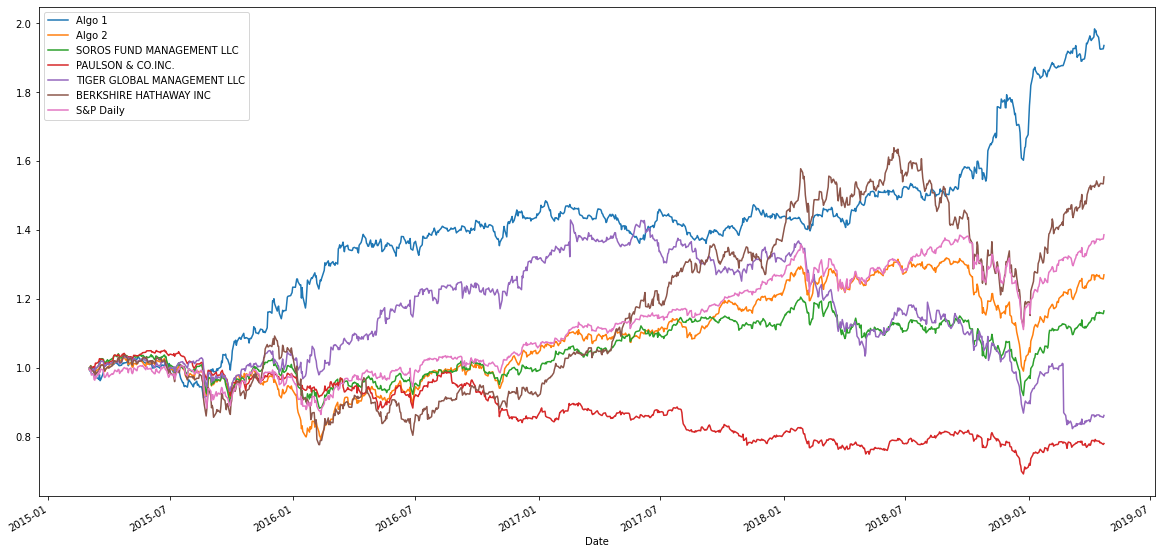

In [17]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
cumulative = (1+combined_df).cumprod().plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

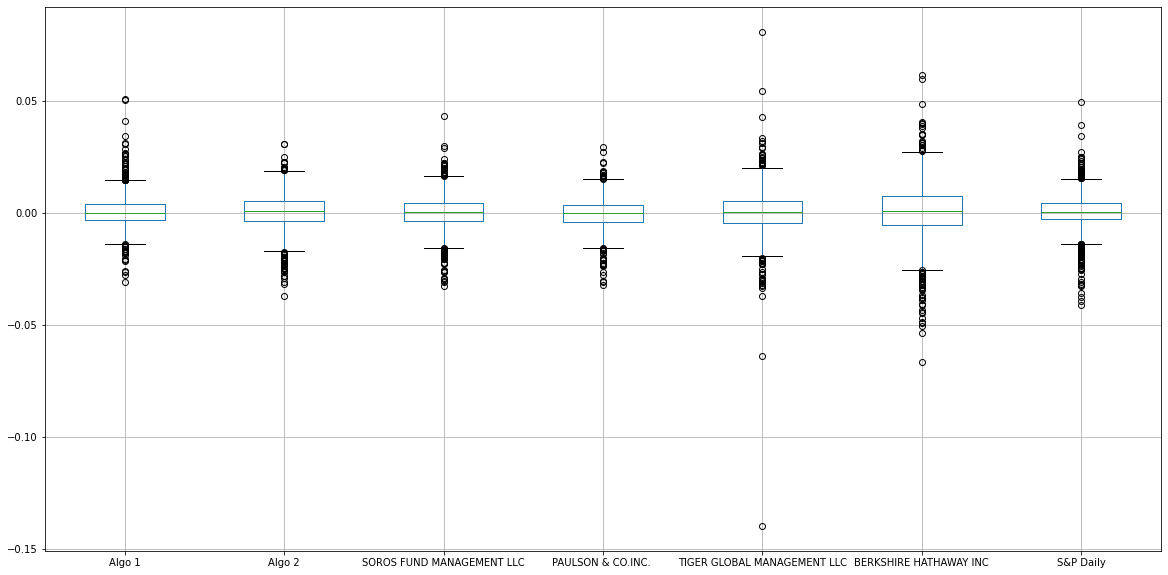

In [18]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
std = combined_df.std()
std.head()

Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
sp_std = combined_df["S&P Daily"].std()

# Determine which portfolios are riskier than the S&P 500
combined_df.std() > sp_std

Algo 1                         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
S&P Daily                      False
dtype: bool

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized = combined_df.std() * np.sqrt(252)
annualized.sort_values(inplace=True)
annualized.head()

PAULSON & CO.INC.            0.111488
Algo 1                       0.120967
SOROS FUND MANAGEMENT LLC    0.125335
Algo 2                       0.132430
S&P Daily                    0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling STD'}, xlabel='Date'>

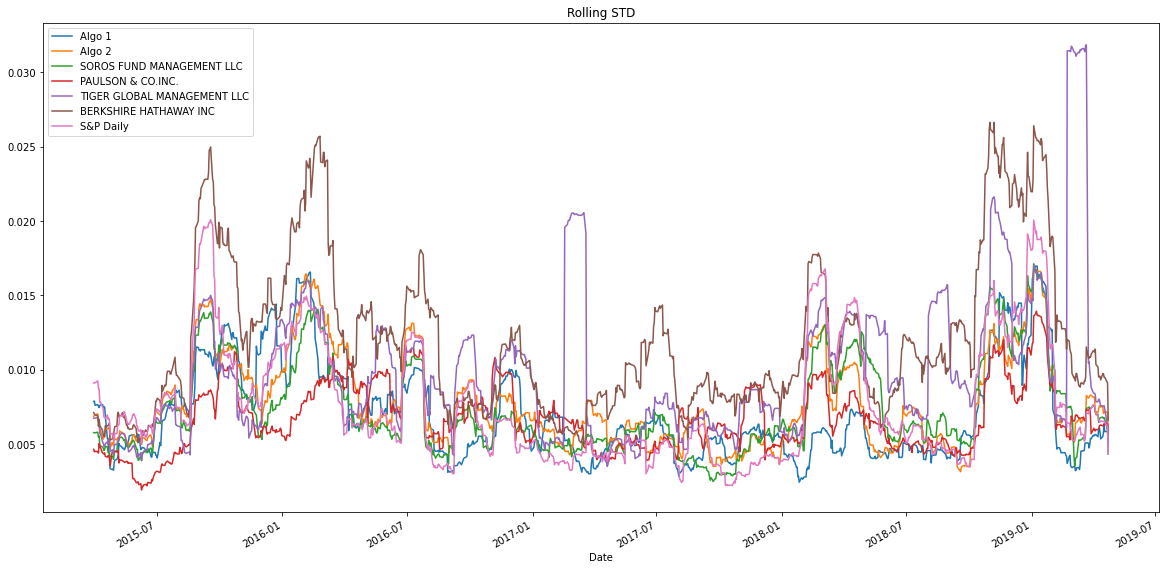

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rollingstd = combined_df.rolling(21).std()
rollingstd.dropna(inplace=True)
# Plot the rolling standard deviation
rollingstd.plot(figsize=(20,10), title='Rolling STD')

### Calculate and plot the correlation

<AxesSubplot:>

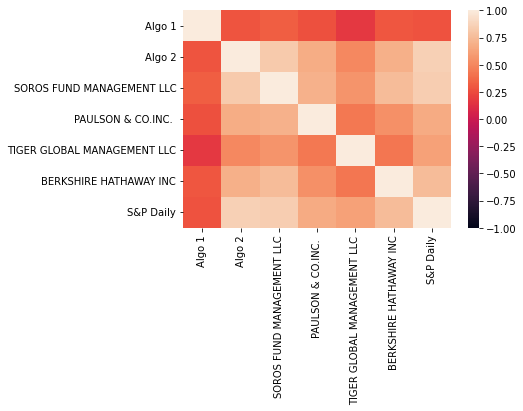

In [23]:
# Calculate the correlation
price_correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Algo 1 Returns vs. S&P 500 Returns'}, xlabel='Date'>

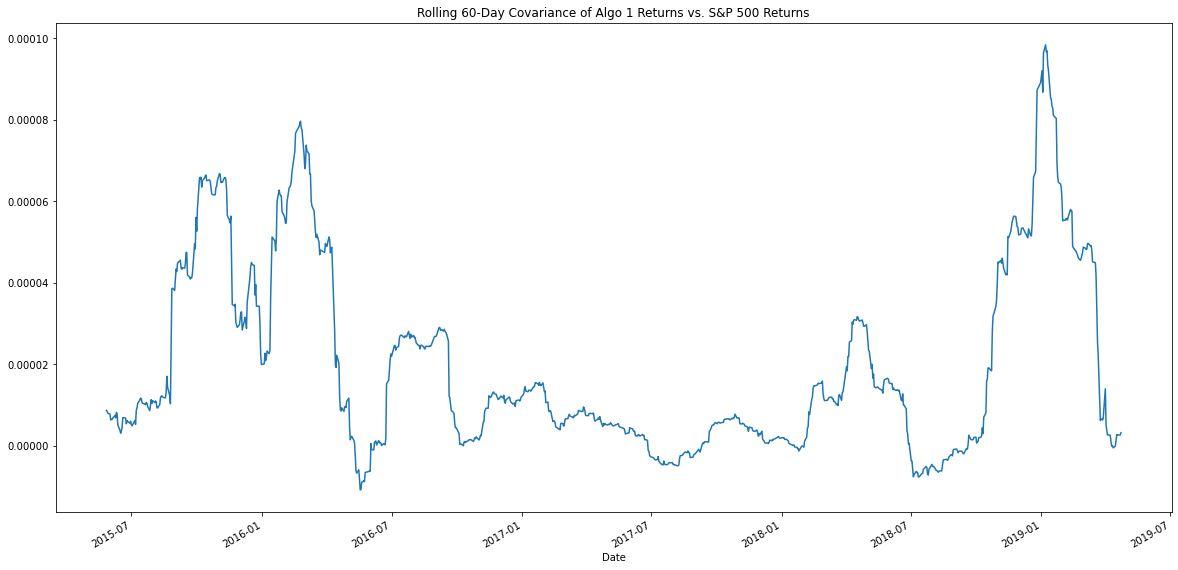

In [24]:
# Calculate covariance of a single portfolio
covariance = combined_df['Algo 1'].cov(combined_df['S&P Daily'])
# Calculate variance of S&P 500
variance = combined_df['S&P Daily'].var()
# Computing beta
algo1_beta = covariance / variance
# Plot beta trend
rolling_covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['S&P Daily'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Algo 1 Returns vs. S&P 500 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [25]:
# Use `ewm` to calculate the rolling window

rolling_window = combined_df.ewm(halflife=21).std()
rolling_window

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P Daily
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.004700,0.002380,0.002472,0.005814,0.001441,0.007624,0.000106
2015-03-05,0.004162,0.002662,0.002677,0.004968,0.002478,0.007020,0.003294
2015-03-06,0.003419,0.007166,0.005349,0.004615,0.004665,0.009387,0.006498
2015-03-09,0.002999,0.006290,0.004638,0.004471,0.005496,0.008066,0.007083
...,...,...,...,...,...,...,...
2019-04-16,0.006922,0.007938,0.007632,0.006846,0.016301,0.011939,0.007837
2019-04-17,0.007097,0.007896,0.007547,0.006846,0.016047,0.011746,0.007736
2019-04-18,0.006984,0.007779,0.007424,0.006737,0.015787,0.011554,0.007610


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratio = combined_df.mean() / std
sharpe_ratio

Algo 1                         0.086847
Algo 2                         0.031583
SOROS FUND MANAGEMENT LLC      0.022452
PAULSON & CO.INC.             -0.030462
TIGER GLOBAL MANAGEMENT LLC   -0.007626
BERKSHIRE HATHAWAY INC         0.039170
S&P Daily                      0.040837
dtype: float64

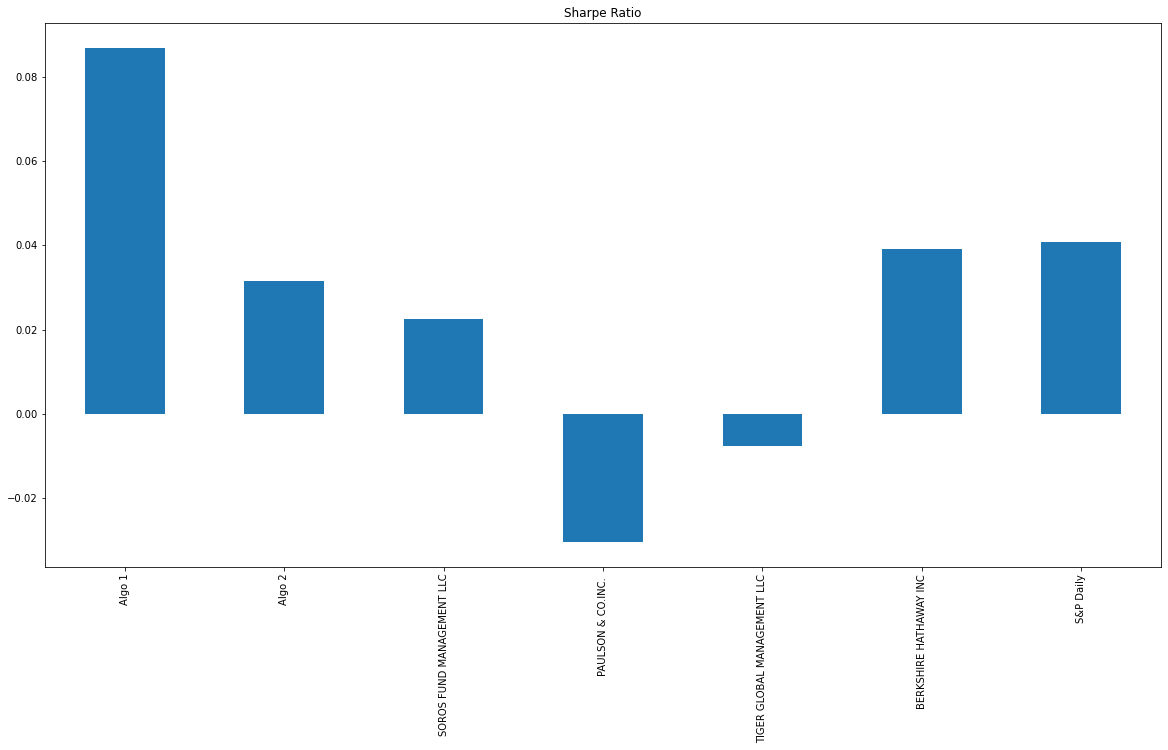

In [27]:
# Visualize the sharpe ratios as a bar plot
sr_plot = sharpe_ratio.plot.bar(figsize=(20,10), title='Sharpe Ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!
## Algo1 outperforms all of the portfolios. Algo 2 outperforms all the whale portfolios except Berkshire Hathaway, and it doesn't outperform the S&P500.  


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock
# Reading whale returns
aapl = Path("aapl_close - Sheet1.csv")
aapl_df = pd.read_csv(aapl, index_col='Date', infer_datetime_format=True, parse_dates=True)
aapl_df.dropna(inplace=True)
aapl_df = aapl_df.rename(columns = {"Close":"APPLE CLOSE"})
aapl_df.head()

,APPLE CLOSE
Date,
2021-06-01 16:00:00,124.28
2021-06-02 16:00:00,125.06
2021-06-03 16:00:00,123.54
2021-06-04 16:00:00,125.89
2021-06-07 16:00:00,125.90


In [29]:
# Reading data from 2nd stock
# Reading whale returns
meta = Path("meta_close - Sheet1.csv")
meta_df = pd.read_csv(meta, index_col='Date', infer_datetime_format=True, parse_dates=True)
meta_df = meta_df.rename(columns = {"Close":"META CLOSE"})

meta_df.dropna(inplace=True)


In [30]:
# Reading data from 3rd stock
# Reading whale returns
tsla = Path("tsla_close - Sheet1.csv")
tsla_df = pd.read_csv(tsla, index_col='Date', infer_datetime_format=True, parse_dates=True)
tsla_df = tsla_df.rename(columns = {"Close":"TESLA CLOSE"})
tsla_df.dropna(inplace=True)

In [31]:
# create data frame for sp500 to compare to my portfolio later on
spx = Path("sp500_close - Sheet1.csv")
spx_df = pd.read_csv(spx, index_col='Date', infer_datetime_format=True, parse_dates=True)
spx_df.dropna(inplace=True)
spx_df = spx_df.rename(columns = {"Close":"SP 500 CLOSE"})
spx_df.head()

,SP 500 CLOSE
Date,
2021-06-01 16:00:00,0.07
2021-06-02 16:00:00,0.06
2021-06-03 16:00:00,0.07
2021-06-04 16:00:00,0.06
2021-06-07 16:00:00,0.07


In [32]:
# Combine all stocks in a single DataFrame
portfolio_df = pd.concat([aapl_df, meta_df, tsla_df, spx_df], axis="columns", join="inner")
portfolio_df

,APPLE CLOSE,META CLOSE,TESLA CLOSE,SP 500 CLOSE
Date,,,,
2021-06-01 16:00:00,124.28,329.13,623.90,0.07
2021-06-02 16:00:00,125.06,329.15,605.12,0.06
2021-06-03 16:00:00,123.54,326.04,572.84,0.07
2021-06-04 16:00:00,125.89,330.35,599.05,0.06
2021-06-07 16:00:00,125.90,336.58,605.13,0.07
...,...,...,...,...
2022-05-17 16:00:00,149.24,202.62,761.61,0.05
2022-05-18 16:00:00,140.82,192.24,709.81,0.06
2022-05-19 16:00:00,137.35,191.29,709.42,0.06


In [33]:
# Reset Date index
portfolio_df.sort_index(inplace=True)
portfolio_df.head()


,APPLE CLOSE,META CLOSE,TESLA CLOSE,SP 500 CLOSE
Date,,,,
2021-06-01 16:00:00,124.28,329.13,623.90,0.07
2021-06-02 16:00:00,125.06,329.15,605.12,0.06
2021-06-03 16:00:00,123.54,326.04,572.84,0.07
2021-06-04 16:00:00,125.89,330.35,599.05,0.06
2021-06-07 16:00:00,125.90,336.58,605.13,0.07


In [34]:
# Reorganize portfolio data by having a column per symbol

# i belive i already did this

In [35]:
# Calculate daily returns
portfolio_df = portfolio_df.pct_change()
# Drop NAs
portfolio_df.dropna(inplace=True)
# Display sample data
portfolio_df.head()

,APPLE CLOSE,META CLOSE,TESLA CLOSE,SP 500 CLOSE
Date,,,,
2021-06-02 16:00:00,0.006276,0.000061,-0.030101,-0.142857
2021-06-03 16:00:00,-0.012154,-0.009449,-0.053345,0.166667
2021-06-04 16:00:00,0.019022,0.013219,0.045754,-0.142857
2021-06-07 16:00:00,0.000079,0.018859,0.010149,0.166667
2021-06-08 16:00:00,0.006672,-0.008616,-0.002545,0.000000


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/4, 1/4, 1/4, 1/4]

# Calculate portfolio return
weighted_returns = (weights * portfolio_df)
weighted_returns = weighted_returns.rename(columns = {"APPLE CLOSE":"APPLE RETURN", "META CLOSE":"META RETURN", "TESLA CLOSE":"TESLA RETURN", "SP 500 CLOSE":"SP 500 RETURN"})

print(weighted_returns.head())
# Display sample data


                     APPLE RETURN  META RETURN  TESLA RETURN  SP 500 RETURN
Date                                                                       
2021-06-02 16:00:00      0.001569     0.000015     -0.007525      -0.035714
2021-06-03 16:00:00     -0.003039    -0.002362     -0.013336       0.041667
2021-06-04 16:00:00      0.004756     0.003305      0.011439      -0.035714
2021-06-07 16:00:00      0.000020     0.004715      0.002537       0.041667
2021-06-08 16:00:00      0.001668    -0.002154     -0.000636       0.000000


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
joined = pd.concat([portfolio_df, weighted_returns], axis="columns", join="inner")
joined.head()

,APPLE CLOSE,META CLOSE,TESLA CLOSE,SP 500 CLOSE,APPLE RETURN,META RETURN,TESLA RETURN,SP 500 RETURN
Date,,,,,,,,
2021-06-02 16:00:00,0.006276,0.000061,-0.030101,-0.142857,0.001569,0.000015,-0.007525,-0.035714
2021-06-03 16:00:00,-0.012154,-0.009449,-0.053345,0.166667,-0.003039,-0.002362,-0.013336,0.041667
2021-06-04 16:00:00,0.019022,0.013219,0.045754,-0.142857,0.004756,0.003305,0.011439,-0.035714
2021-06-07 16:00:00,0.000079,0.018859,0.010149,0.166667,0.000020,0.004715,0.002537,0.041667
2021-06-08 16:00:00,0.006672,-0.008616,-0.002545,0.000000,0.001668,-0.002154,-0.000636,0.000000


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined.dropna

<bound method DataFrame.dropna of                      APPLE CLOSE  META CLOSE  TESLA CLOSE  SP 500 CLOSE  \
Date                                                                      
2021-06-02 16:00:00     0.006276    0.000061    -0.030101     -0.142857   
2021-06-03 16:00:00    -0.012154   -0.009449    -0.053345      0.166667   
2021-06-04 16:00:00     0.019022    0.013219     0.045754     -0.142857   
2021-06-07 16:00:00     0.000079    0.018859     0.010149      0.166667   
2021-06-08 16:00:00     0.006672   -0.008616    -0.002545      0.000000   
...                          ...         ...          ...           ...   
2022-05-17 16:00:00     0.025423    0.012897     0.051410     -0.166667   
2022-05-18 16:00:00    -0.056419   -0.051229    -0.068014      0.200000   
2022-05-19 16:00:00    -0.024641   -0.004942    -0.000549      0.000000   
2022-05-26 16:00:00     0.046815    0.001777    -0.002382     -0.166667   
2022-05-31 16:00:00     0.035193    0.010489     0.071397      0.2

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
annualized_std = weighted_returns.std() * np.sqrt(252)
annualized_std.sort_values(inplace=True)
annualized_std

APPLE RETURN     0.077465
META RETURN      0.139404
TESLA RETURN     0.161823
SP 500 RETURN    0.450142
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling STD'}, xlabel='Date'>

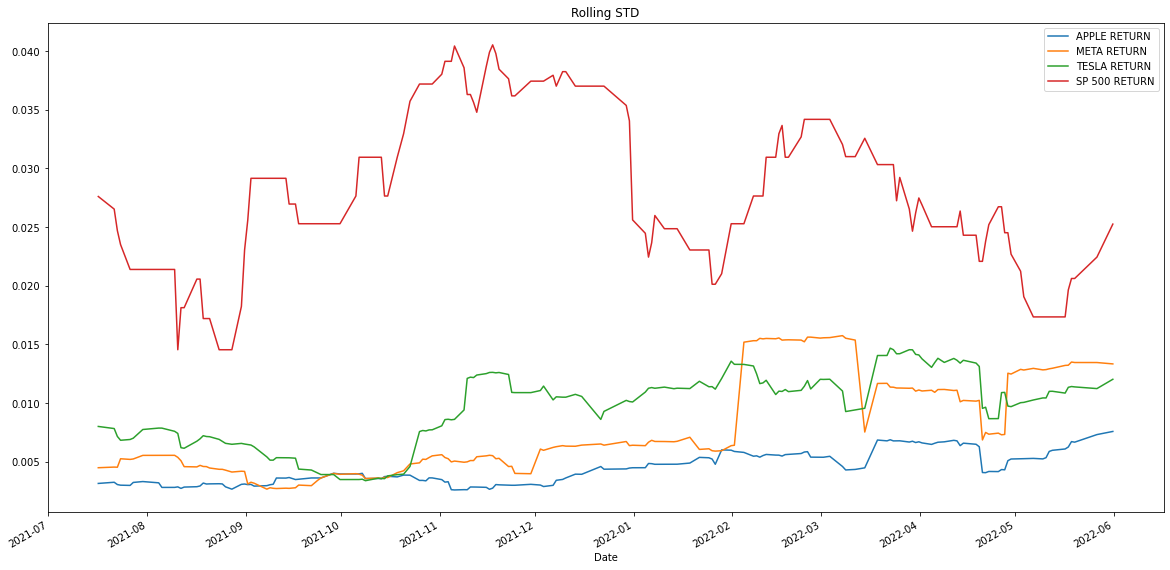

In [40]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling = weighted_returns.rolling(21).std()
rolling.dropna(inplace=True)
# Plot the rolling standard deviation
rolling.plot(figsize=(20,10), title='Rolling STD')

### Calculate and plot the correlation

<AxesSubplot:>

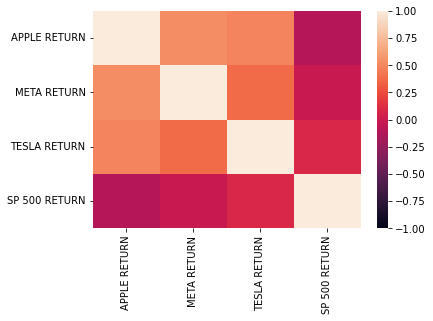

In [41]:
# Calculate and plot the correlation
correlation = weighted_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Portfolio Returns vs. S&P 500 Returns'}, xlabel='Date'>

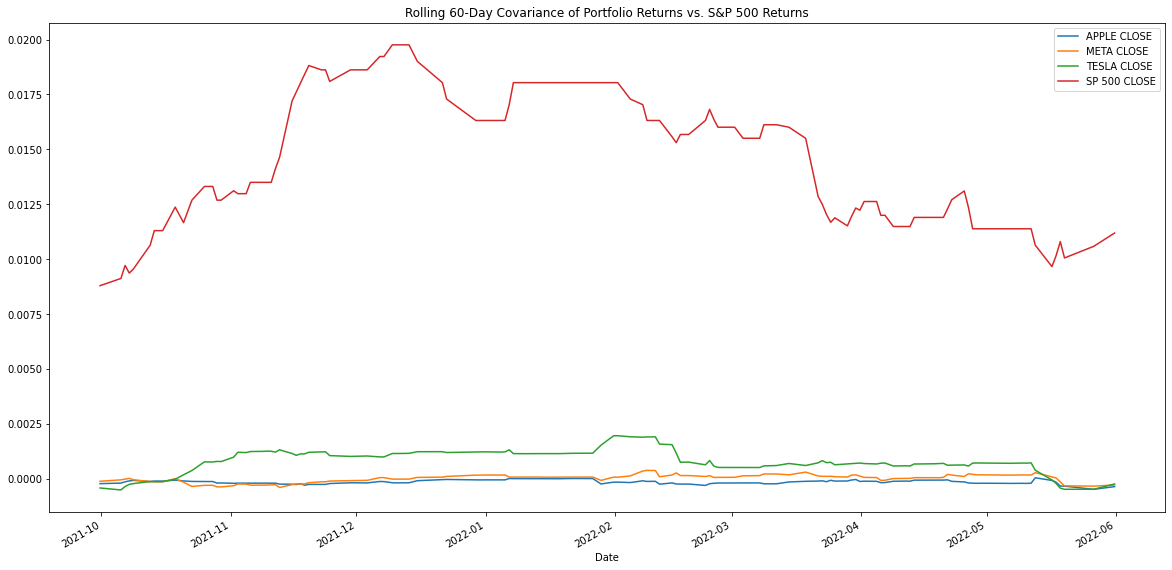

In [46]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
cov = portfolio_df['APPLE CLOSE'].cov(portfolio_df['SP 500 CLOSE'])
# Calculate variance of S&P 500
var = portfolio_df['SP 500 CLOSE'].var()
# Computing beta
beta = cov / var
# Plot beta trend
rolling_cov = portfolio_df.rolling(window=60).cov(portfolio_df['SP 500 CLOSE'])
rolling_cov.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Portfolio Returns vs. S&P 500 Returns')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualized Sharpe Ratios
sharpe = weighted_returns.mean() / annualized_std
sharpe

APPLE RETURN    -0.032973
META RETURN     -0.018323
TESLA RETURN    -0.015784
SP 500 RETURN   -0.005674
dtype: float64

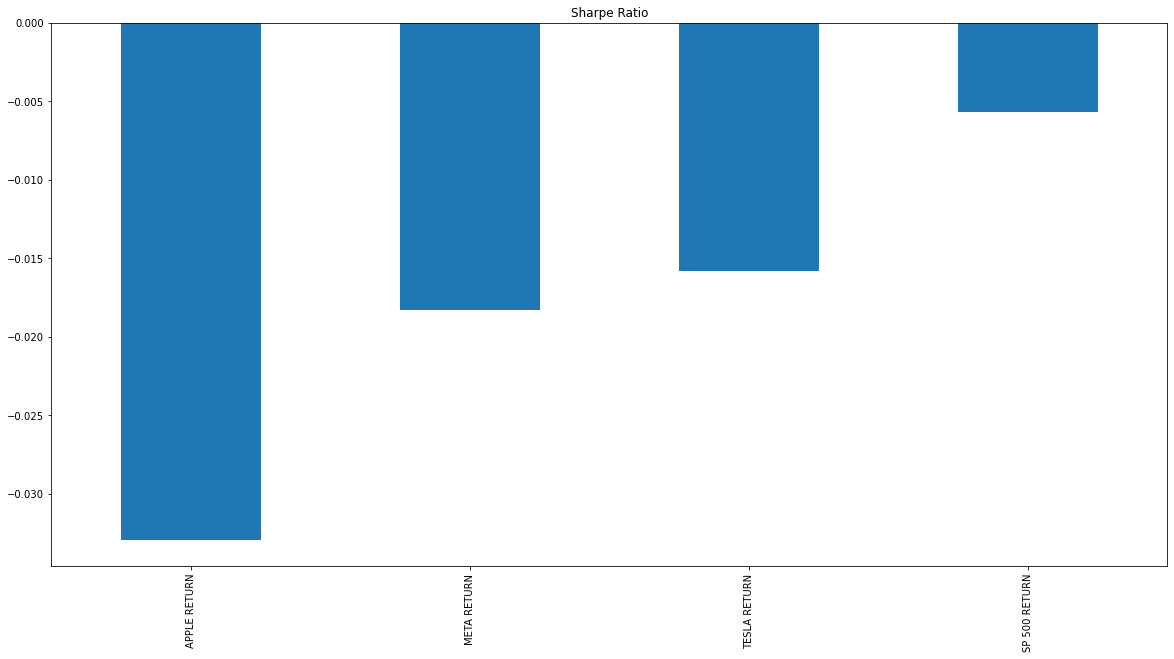

In [48]:
# Visualize the sharpe ratios as a bar plot
sharpe_plot = sharpe.plot.bar(figsize=(20,10), title='Sharpe Ratio')

### How does your portfolio do?

Write your answer here!

In [ ]:
My porfolio seems to under-perform compared to the SP500